## AST4310, Autumn 2022, Project 1:
## Basic Spectral Line Formation ("Cecilia Payne-Gaposchkin")

Authored by : ***1*** and ***3***.



#### Header and imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from astropy import units
from astropy import constants
from astropy import units

from astropy.visualization import quantity_support
quantity_support()

h = constants.h.value 
k_B = constants.k_B.value 
c = constants.c.value 
e = constants.e.value 

plt.rc('legend', frameon=False)
# plt.rc('figure', figsize=(7, 7/1.3))
plt.rc('figure', figsize=(10, 10/1.3))
plt.rc('font', size=13)

### Exercise 1

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> 

* Identify the four hydrogen lines in the image with stellar spectrograms (first figure in section 1). Looking at the hydrogen energy level diagram in section 1.2, to which series do they correspond? What are their lower and upper levels? Compute their central wavelengths precisely using equation (5). 

* Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra scales linearly with the population density of the lower level of the corresponding transition. Why would she think so? (It is not correct, but generally stellar absorption lines do get stronger at larger lower-level population. In this exercise we follow her example and assume that the scaling is linear.) 

* Use this expectation to give initial rough estimates of the strength ratios of the $\alpha$ lines in the the H I Lyman, Balmer, Paschen and Brackett series. Use T=5000 K. 

* Explain from equations (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature. 

* Speculate how ionisation can fully deplete a stage (e.g. all atoms can transition from neutral to ionised) while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature? 

</i>
</div>

The wavelengths in the stellar spectrogram have the approximate range $\lambda  \in [3800, 5000]$ Å, which narrows them down to the Balmer series of neutral hydrogen. The Balmer $\alpha$ line is outside of this range so we identify the four hydrogen lines as Ba $\beta$ (H $\beta$), Ba $\gamma$ (H $\gamma$), Ba $\delta$ (H $\delta$) and Ba $\epsilon$ (H $\epsilon$), from right to left in the spectrogram. This correspond two the Balmer series. The lower energy level for the Balmer series is $s=2$ and upper energy levels are:

* Ba $\beta$: $s=4$
* Ba $\gamma$: $s=5$
* Ba $\delta$: $s=6$
* Ba $\epsilon$: $s=7$

We find the energies at each level with $\chi_{1,s} = 13.598(1-1/s^2)$ eV, and the central wavelength by calculating:
\begin{align*}
    \lambda = \frac{hc}{\chi_{1,\Delta s}}
\end{align*}
for each line.

In [31]:
chi_hydrogen = lambda s: 13.598 * (1 - 1/s**2) * e 
g_hydrogen = lambda s: 2 * s**2 

def central_wl(s_high, s_low):
    chi_high = chi_hydrogen(s_high)
    chi_low = chi_hydrogen(s_low)
    lmbda = h * c / (chi_high - chi_low)
    return lmbda * 1e10 #return wavelength in units of Å

#   nice print
for s_high, name in zip([4,5,6,7], ['Ba β', 'Ba γ', 'Ba δ', 'Ba ε']):
    cent_wav = central_wl(s_high, s_low=2)
    print(f"Central wavelength for {name}: {cent_wav:.2f} Å")

Central wavelength for Ba β: 4862.84 Å
Central wavelength for Ba γ: 4341.82 Å
Central wavelength for Ba δ: 4103.02 Å
Central wavelength for Ba ε: 3971.32 Å


# _Discuss Payne's assumption___

Assume a linear relationship between the strength of the absorption lines and the population densities, we have 

$$ \text{strength} \propto n_{r,s} = N_r \frac{g_{r,s}}{U_r} e^{-\chi_{r,s} / kT} $$

For the $\alpha$ lines in H I we have $r=1$. The strength ratio between two lines with levels $s$ and $t$ is thus given by $\frac{n_{r,s}}{n_{r,t}}$ where there factors $N_r$ and $U_r$ cancels out, resulting in

$$ \frac{n_{r,s}}{n_{r,t}} = \frac{g_{r,s}}{g_{r,t}} e^{-(\chi_{r,s} - \chi_{r,t})/kT} $$

The strength ratio between the $\alpha$ lines for H I is thus $n_{r,1}/n_{r,2}$ between Lyman $\alpha$ and Balmer $\alpha$. 

In [32]:
#   strength ratios
def strength_ratio(s, t, temp=5000):
    ns_nt = g_hydrogen(s) / g_hydrogen(t) \
                * np.exp(- (chi_hydrogen(s) - chi_hydrogen(t)) / (k_B * temp))
    return ns_nt

# Ly_Ba = strength_ratio(s=2, t=1)
# Ba_Pa = strength_ratio(s=3, t=2)
# Pa_Br = strength_ratio(s=4, t=3)

# ground_states = {
#     'Ly α': 1,
#     'Ba α': 2,
#     'Pa α': 3,
#     'Br α': 4
# }

print(f"Ly/Ba: {strength_ratio(1,2):.2e}")
print(f"Ly/Pa: {strength_ratio(1,3):.2e}")
print(f"Ly/Br: {strength_ratio(1,4):.2e}")
print(f"Ba/Pa: {strength_ratio(2,3):.2e}")
print(f"Ba/Br: {strength_ratio(2,4):.2e}")
print(f"Pa/Br: {strength_ratio(3,4):.2e}")


# #   nice print
# for s, name in zip(range(1,4), ["Ly/Ba", "Ba/Pa", "Pa/Br"]):
#     print(f"{name}: {strength_ratio(s,s+1):.2e}")

Ly/Ba: 4.76e+09
Ly/Pa: 1.69e+11
Ly/Br: 4.42e+11
Ba/Pa: 3.56e+01
Ba/Br: 9.29e+01
Pa/Br: 2.61e+00



// Comment: Explanation for U_r convergence below. Could be explained more in terms of physical properties, and maybe be a bit shorter.

Before we consider the limiting temperature behaviour of the two distributions we will look at the partition function, given as 

$$ U_r = \sum_s g_{r,s} e^{-\chi_{r,s}/kT} $$

Here, the sum over $s$ goes to infinity. If we consider hydrogen with $g_{1,s}=2s^2$, the partition function will become infinite. However, we can set an upper limit on the energy levels by requiring that the distance from the nucleus to the electron at an energy level according to the Bohr model, should not exceed the average distance between the atoms in the gas. For a gas with particle density $N$, assuming that the volume goes as $r^3$, we get $r\propto N^{-1/3}$. From the Bohr model, we have $r_s = s^2 a_0 /Z$, where $Z$ is the proton number, and $a_0$ is the Bohr radius. Equating the two radii, we can solve for $s$ which gives an approximate value of $s_{\mathrm{max}}$. 

$$ s_{\mathrm{max}} \sim \sqrt{\frac{Z}{a_0}} N^{-1/3} $$

So $U_r$ will converge if we sum over $s < s_{\mathrm{max}}$ 




The Boltzmann law and Saha law have different temperature dependencies. Considering the limit $T \to \infty$ the Boltzmann law yields 


$$ \lim_{T\to\infty} \frac{n_{r,s}}{N_r} = \lim_{T\to\infty} \frac{g_{r,s}}{U_r} e^{-\chi_{r,s} / kT} = \frac{g_{r,s}}{\sum_{s}g_{r,s}} $$
where the Boltzmann factor in both the above expression and in the partition function approaches $1$ at infinite temperature. The partition function then becomes a sum over $g_{r,s}$. At a given ionization state, $r$, the population density in a level $s$ is now solely dependent on the statistical weight of said level. 

As temperature approaches infinity, the Saha law becomes 

$$ \lim_{T\to\infty} \frac{N_{r+1}}{N_r} = \lim_{T\to\infty} \frac{1}{N_e} \frac{2 \sum_{s} g_{r+1,s}}{\sum_{s} g_{r,s}} \left( \frac{2\pi m_e k T}{h^2} \right)^{3/2} \propto \lim_{T\to\infty} T^{5/2} = \infty $$ 

where $T^{5/2}$ comes from multiplying the initial factor $T^{3/2}$ with the electron density, $1/N_e = k T / P_e$. We see that the Saha law ratio diverges at infinite temperature. Eventually, the remaining constant factors become negligible and we can interpret this as all particles in stage $r$ have been ionized. For the Boltzmann law, the partition function of a state $r$ becomes constant, so the ratio $n_{r,s}/N_r$ is only dependent on the statistical weight $g_{r,s}$ of level $s$. When higher values of $g_{r,s}$ correspond to higher levels $s$ in a given stage, excitation will only increase the population density of the higher levels. 


We deduce from the above that excitation, which is governed by the Boltzmann law that converges for $s<s_{max}$, puts only a few atoms in levels just below the ionisation level. This could be because the distribution across energy levels $s$ is governed by the values of the the statistical weight for these high temperatures. The Saha distribution on the other hand diverges at high temperatures, which means that the population ratio between increasing ionisation stages diverges to infinity in such a way that we effectively have no atoms in the lower ionisation stages compared to the higher ionisation stages. 

  // Comment: The above text answers the last two questions. To be improved/elaborated. Johan improved some, perhaps more is needed. 


### Exercise 2

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">  
<i>

* Using the simplified Ca atom (`Ca_atom.txt`), plot and discuss the temperature variation of the partition functions $U_r$ for the first four ionisation stages in the file. Look in the temperature range between 100 - 30,000 K. What can you say about the temperature dependence of $U_r$? 
    
* Plot a "Payne curve" for the simplified Ca atom using a temperature range of 100 - 175,000 K. Start with $P_e$= 100 Pa and study how $P_e$ affects the diagram. What is going on? 
    
* Make a separate figure with a Payne curve for an element of your choice. You can choose one of the existing model atoms, or you can use the [NIST atomic spectra database](https://physics.nist.gov/PhysRefData/ASD/levels_form.html) to build a model for any atom you'd like. How does it compare with Ca? 

</i>
</div>

In [33]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        self.filename = filename[5:]
        tmp = np.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = np.empty((self.n_stages, self.max_levels))
        chi.fill(np.nan)
        self.g = np.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, np.newaxis]
        self.loaded = True
        
    def compute_partition_function(self, temperature):
        """
        Computes partition functions using the atomic level energies and
        statistical weights.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        if not self.loaded:
            raise ValueError("Missing atom structure, please load atom with read_atom()")
        temp = temperature[np.newaxis, np.newaxis]  # to allow broadcast
        return np.nansum(self.g[..., np.newaxis] * 
                            np.exp(-self.chi[..., np.newaxis] / 
                                      constants.k_B / temp), axis=1)
    
    def compute_excitation(self, temperature):
        """
        Computes the level populations relative to the ground state,
        according to the Boltzmann law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        pfunc = self.compute_partition_function(temperature)
        # Reshape arrays to allow broadcast
        temp = temperature[np.newaxis, np.newaxis]
        g_ratio = self.g[..., np.newaxis] / pfunc[:, np.newaxis]  # relative to total number of atoms in this stage
        chi = self.chi[..., np.newaxis]
        return g_ratio * np.exp(-chi / (constants.k_B * temp))
       
    def compute_ionisation(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (constants.k_B * temperature)
        saha_const = ((2 * np.pi * constants.m_e * constants.k_B * temperature) / 
                      (constants.h ** 2)) ** (3 / 2)
        nstage = np.zeros_like(partition_function) / units.m ** 3
        nstage[0] = 1. / units.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             np.exp(-self.chi_ion[r + 1, np.newaxis] / 
                                       (constants.k_B * temperature[np.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage / np.nansum(nstage, axis=0)

    def compute_populations(self, temperature, electron_pressure):
        """
        Computes relative level populations for all levels and all
        ionisation stages using the Bolzmann and Saha laws.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        return (self.compute_excitation(temperature) * 
                self.compute_ionisation(temperature, electron_pressure)[:, np.newaxis])


    def plot_partition_function(self, temperature):
        """
        Need ax infos.
        """
        U = self.compute_partition_function(temperature)
        fig, ax = plt.subplots()
        for r in range(4):
            ax.plot(temperature, U[r], label=f'r={r+1:.0f}')
        atom_title = f'for the {self.filename[:2]} atom'
        ax.set_title('Partition function of the first four ionization stages \n' + atom_title)
        ax.set_xlabel('Temperature [K]')
        ax.set_ylabel(r'$U_r$')
        ax.grid()
        plt.legend()
        plt.show()


    def plot_payne(self, temperature, electron_pressure):
        pops = self.compute_populations(temperature, electron_pressure)
        fig, ax = plt.subplots()
        ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,0].T, 'b-')
        ax.plot([],[], 'b-', label='s=1')
        n_levels = self.chi.shape[0]
        if n_levels > 1:
            ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,1].T, 'r--')
            ax.plot([],[], 'r--', label='s=2')
        if n_levels > 2:
            ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,2].T, 'k:')
            ax.plot([],[], 'k:', label='s=3')

        ax.set_yscale('log')
        ax.set_ylim(1e-6, 1.1)
        ax.set_xlabel('Temperature [K]')
        ax.set_ylabel('Populations')
        ax.set_title(fr'Payne Curve for {self.filename[0:2]} with electron pressure $P_a=${electron_pressure:.2e}')
        ax.legend()



We now make a plot of the first four ionization stages of the simplified Ca atom for temperatures of $T\in[100,\,30\cdot 10^3]\,\mathrm{K}$

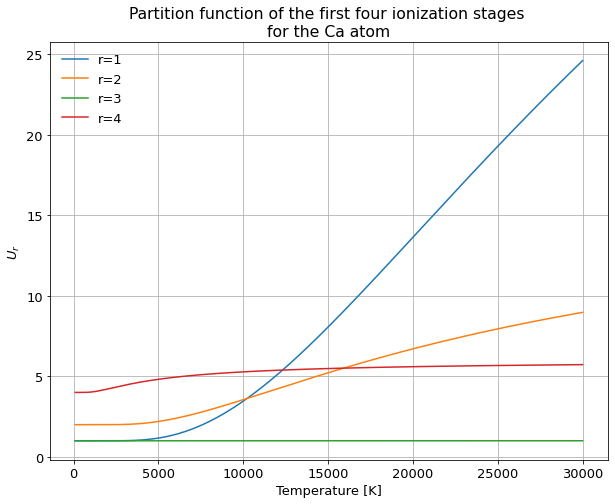

In [34]:
Ca = Atom("data/Ca_atom.txt")
T_part_func = np.linspace(100, int(3e4), int(1e4)) * units.K
Ca.plot_partition_function(temperature=T_part_func)


Initially, the partition function is dominated by the value of $g_{r,s}$ at the lowest level in each state, since $\chi=0$ at these levels. For *SHOULD THIS BE R?* $s=1,2,3,4$ we have $g_{r,s}=1,2,1,4$, respectively, yielding the starting point of each curve. The remaining terms are strongly suppressed by the exponential term for low temperature values. The partition functions eventually start increasing with temperature, but at different points. The different starting points are mainly governed by the values of $g_{r,s}$ and $\chi_{r,s}$ at the different stages. For low values of $\chi$ the exponent will increase more rapidly. So for low energy differences between the ground state and the excited states in the different stages we will se an *increase?* increment in $U_r$ at lower temperatures. This explains why the stage *r* $s=3$ has a partition function that is more or less constant in the given temperature range. The energy difference from the ground state to the first excited state for this particular stage is more than ten times greater compared to the other stages. For $r=4$, the difference is approximately five times lower than that of $r=1$ and $r=2$, yielding a noticeable change in $U_r$ around $T=10^3\,\mathrm{K}$. For $r=1$ and $r=2$ $U_r$ starts increasing at around $T=4\cdot 10^3\,\mathrm{K}$.

With $\chi$ governing the temperature ranges where we expect $U_r$ to start rising, the value of $g_{r,s}$ at these energies determines how much increment we may get. For $r=1$ there are numerous low values of $\chi$, and with large values of $g$ in this stage, we see that $U_r$ increases steadily once a certain temperature has been reached. As temperature increases, more and more levels become dominant, where the factors of $g$ range from $g=1$ to $g=21$. This explains why the low temperature increment of $U_{r=4}$ eventually stabilizes. From the first excited state to the next one, $\chi$ increases by a factor of around $50$. Thus, the first excited state is the only main contributor for the temperatures we consider, and having a factor of $g=2$ at this state we get a slow increment that eventually stabilizes. For $r=2$ all the excited states have a relatively low value, but having only four of them, at relatively low value, compared to $r=1$, the increment is less rapid, and eventually stabilizes. 

In general, all partition functions will eventually stabilize as the temperature reaches a certain value. The final values will eventually be governed by our limited selection of g values at different stages. 

// Comment on the probability of excitation for the levels

// Elaborate on general temperature dependency of U

// Simplify above explanation

Next, we want to plot Payne curves

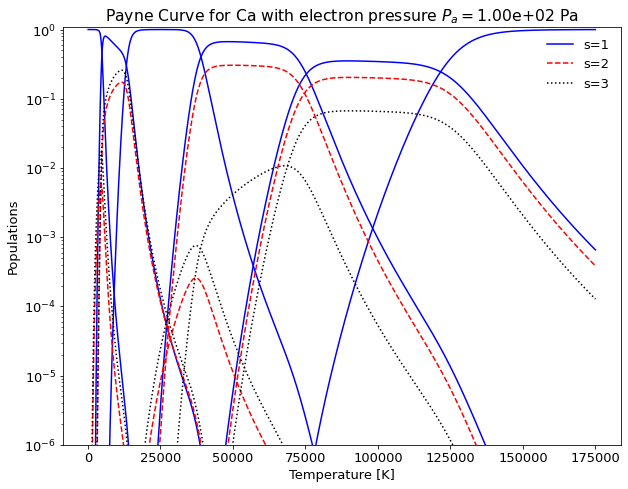

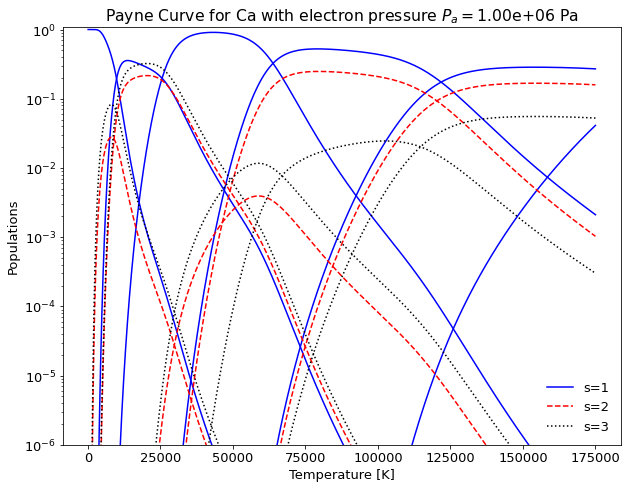

In [35]:
#   "payne" curve

#want to plot the level population

T_payne = np.linspace(100, int(175e3), int(1e4)) * units.K
electron_pressure = 100 * units.Pa
Ca.plot_payne(T_payne, electron_pressure)
Ca.plot_payne(T_payne, electron_pressure*1e4)
# Ca.plot_payne(T_payne, 100 * units.Pa)


Above, we see the resulting Payne curves for the different stages of first three excitation levels, $s=1,\, 2,\, 3$, of Calcium using $P_e=100\,\mathrm{Pa}$ in the upper panel, and $P_a=10^6 \,\mathrm{Pa}$ in the lower panel. For the upper panel all Calcium is neutral and in its ground state to begin with, but this fraction rapidly drops at a certain temperature and singly ionized Calcium becomes dominant. As temperature increases, excitation also plays an important role, as is evident for singly ionized Calcium, where a noteable fraction of the population comes from $s=1$ and $s=2$. As temperature increases the different ionization stages overlap, and single ionization levels seize to dominate the entire population. Here, the excited states at different stages begin to play a significant role. The peaks of the ionization stages drops gradually as temperature increases, until we start reaching the final stage in our model atom, $r=6$. 
/// Fix above, add stuff if needed.     

Similar behaviour is also seen in the lower panel, where the electron pressure is increased by a factor $10^4$. Although the $s=1$ curves are relatively similar in shape, much higher temperatures are needed in order for ionization to occur. When we increase the electron pressure we essentially increase the number density of surrounding electrons, leaving less space for a potentially free electron. A high density of electrons yields an increased Coulomb force on electrons in the atom and a higher energy is required for ionization to take place. This can also be seen from the populations of singly and doubly ionized Calcium, where singly ionized Calcium is noteably more abundant in the excited states, since the high temperatures have excited many of the electrons before a second ionization takes place. For doubly ionized Calcium, the energy required to excite electrons is so high that for $P_e=100\,\mathrm{Pa}$ most of the electrons became ionized before they got excited. With increased electron pressure, this is no longer the case, and more electrons now become excited before the third ionization level becomes dominant once again.  

// Shorten above explanation. Add other comments?

// Below: Plot Payne curve for different atom. Added Na as placeholder. Discuss

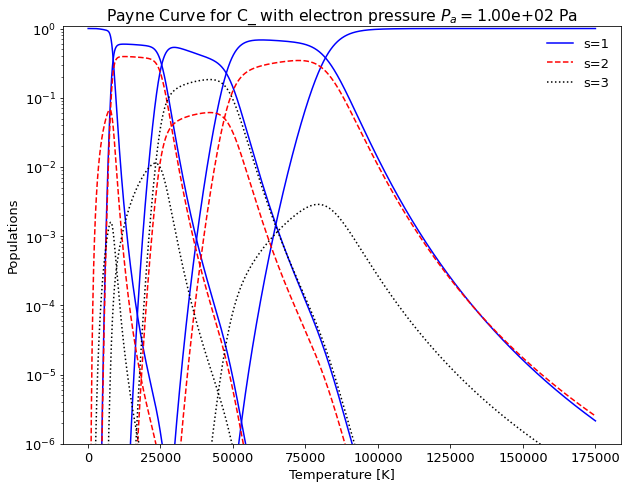

In [36]:
Na = Atom("data/C_atom.txt")
Na.plot_payne(T_payne, electron_pressure)

### Exercise 3

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">  
<i>

* Explain qualitatively why the solar $\text{Ca}^+$ K line is much stronger than the solar H $\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and calcium is far less abundant than hydrogen in the Sun: the Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a \"curve of growth\" as you will see in Project 2).
    
* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm $^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`. 
    
* The relative population change $(\Delta n / \Delta T) / n$ is useful to to diagnose the temperature sensitivity of the populations of a given atomic stage. Plot in a log scale the relative population changes for the lower levels of $\text{Ca}^+$ K and H $\alpha$ vs. temperature, using  $\Delta T=$ 1 K. Around $T=$ 5600 K the $\text{Ca}^+$ K curve dips down to very  small values; the H $\alpha$ curve does that around $T=$ 9500  K. Thus, at $T \approx$ 5600 K the temperature sensitivity of $\text{Ca}^+$ K is much smaller than the temperature sensitivity of H $\alpha$. Compare these plots with plots of the populations of the lower levels for the two lines (normalise them to the maximum value of each for easier comparison). You should find that the population plots have a peak and two flanks. Explain each flank of the population plots and the dips in the temperature sensitivity plots.

* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature.

</i>
</div>

Even though Hydrogen is far more abundant than Calcium in the sun, with a ratio of $N_\mathrm{Ca}/N_\mathrm{H}=2\cdot 10^{-6}$, the $\mathrm{Ca^+ K}$ line is much stronger than the $\mathrm{H \alpha}$ line in the sun, because we assume that spectral lines scales with the lower level population density, not the total abundance of individual elements. The overall abundance will affect the lower level population density. However, for $\mathrm{Ca^+ K}$, we must consider the abundance of singly ionized Calcium in the ground state. For Balmer $\alpha$, the population to consider is that of the first excited state of neutral Hydrogen. The energy required to singly ionize calsium  is less than what is required to excite the hydrogen atom. Thus, the population density in the ground state of $\mathrm{Ca^+ K}$ is greater that that of the first excited stage of $\mathrm{H}$. As a result the $\mathrm{Ca^+ K}$ line is stronger than the $\mathrm{Ba \;\alpha}$ where the atoms have relatively low energy, as for chromospheric temperatures. 

When we compute the populations of $\mathrm{Ca^+ K}$ in the `Atom` class we normalize it with the total number of Calcium atoms. If we denote the relative population of $\mathrm{Ca^+ K}$ as 
$$P(\mathrm{Ca^+ K})=\frac{n_\mathrm{Ca^+ K}}{ N_\mathrm{Ca}}$$
where $N_\mathrm{Ca}$ denotes the total number of Calcium atoms, the ratio between the population densities of $n_\mathrm{Ca^+ K}$ and $n_\mathrm{H \alpha}$ become 


$ \frac{n_\mathrm{Ca^+ K}}{n_\mathrm{H \alpha}} = \frac{P(\mathrm{Ca^+ K})}{P(\mathrm{H \alpha})}\cdot \frac{N_\mathrm{Ca}}{N_\mathrm{H}} = \frac{P(\mathrm{Ca^+ K})}{P(\mathrm{H \alpha})} \cdot 2\cdot 10^{-6} $



We then plot this ratio for a range of temperatures $T\in[1, 20] \cdot 10^3$ K

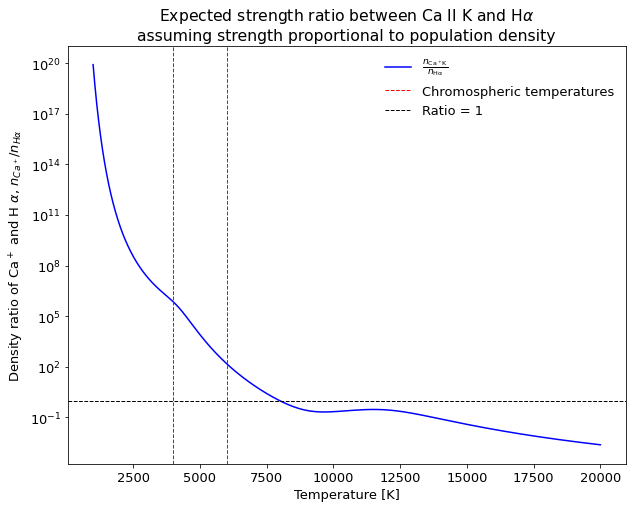

In [41]:
#   strength ratio comparison
H = Atom("data/H_atom.txt")
T_chrom = np.linspace(1e3, 20e3, int(1e4)) * units.K 
Pe_chrom = 1e2 * units.dyn * units.cm**(-2) 

Halpha_pop = H.compute_populations(T_chrom, Pe_chrom)[0,1,:]
Ca_II_pop = Ca.compute_populations(T_chrom, Pe_chrom)[1,0,:]

n_ratio = (Ca_II_pop / Halpha_pop) * 2e-6

plt.plot(T_chrom, n_ratio, ls="-", color="blue", label=r"$\frac{n_\mathrm{Ca^+ K}}{n_\mathrm{H \alpha}}$")
plt.yscale('log')
title1 = r'Expected strength ratio between Ca II K and H$\alpha$' 
title2 = 'assuming strength proportional to population density'
plt.title(title1 + '\n' + title2)
plt.ylabel(r'Density ratio of Ca$^+$ and H $\alpha$, $n_{Ca^+} / n_{H \alpha}$')
plt.xlabel('Temperature [K]')
plt.axvline(4000, ls="--", lw=1, color="red", label="Chromospheric temperatures")
plt.axvline(6000, ls="--", lw=1, color="red")
plt.axhline(1, ls="--", lw=1, color="black", label="Ratio = 1")
plt.legend()
plt.show()




We see from the figure above that for the chromospheric temperature range marked with red dashed lines, the ratio of $\mathrm{Ca^+ K}$ to $\mathrm{H} \alpha$ is significantly larger than 1. Thus it makes sense that the line of $\mathrm{Ca^+ K}$ is stronger, as predicted. At higher temperatures the ratio drops below 1, meaning that the abundance of hydrogen excited to the first level becomes greater than the abundance of singly ionised calsium. This is also to be expected since higher temperatures yield more energetic atoms. Higher energy also means that calsium is further ionised beyond singly, resulting in a weaker $\mathrm{Ca^+ K}$ line.

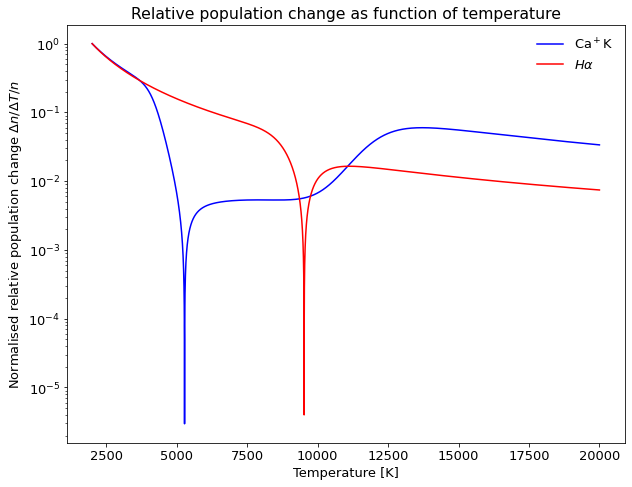

Temperature of Halpha curve dip: 9521 K
Temperature of CaII K curve dip: 5278 K


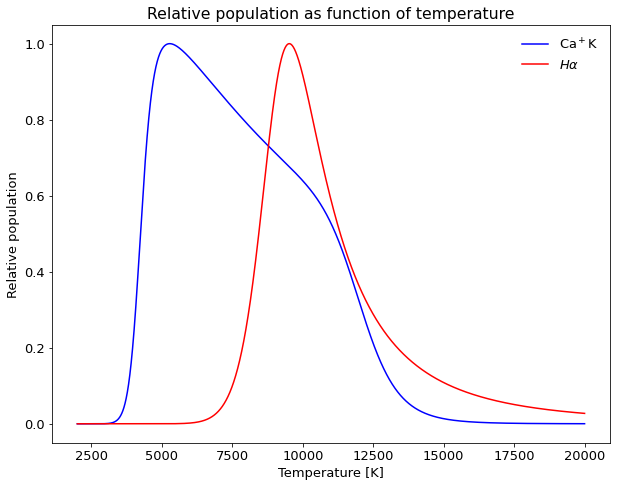

Temperature of Halpha curve peak: 9521 K
Temperature of CaII K curve peak: 5278 K


In [50]:
#   Relative population change
T_sensitivity = np.linspace(2e3, 20e3, int(1e4)) * units.K
def rel_pop_change(t,p, type=None):
    if type=="Ca":
        pop = Ca.compute_populations(t, p)[1,0,:]
        pop_p1 = Ca.compute_populations(t + 1*units.K, p)[1,0,:]
    elif type=="H":
        pop = H.compute_populations(t, p)[0,1,:]
        pop_p1 = H.compute_populations(t + 1*units.K, p)[0,1,:]
    else:
        return None 
    
    rel_pop_change = np.abs(pop_p1 - pop) / pop 
    return rel_pop_change / np.max(rel_pop_change)

CaII_rel_pop_change = rel_pop_change(T_sensitivity, Pe_chrom, type="Ca") 
Ha_rel_pop_change = rel_pop_change(T_sensitivity, Pe_chrom, type="H") 
plt.title("Relative population change as function of temperature")
plt.xlabel("Temperature [K]")
plt.ylabel(r"Normalised relative population change $ \Delta n/\Delta T/n$")
plt.plot(T_sensitivity, CaII_rel_pop_change, color='blue', label=r'$\mathrm{Ca^+ K}$')
plt.plot(T_sensitivity, Ha_rel_pop_change, color='red', label=r'$H \alpha$')
plt.yscale('log')
plt.legend()
plt.show()

print(f"Temperature of Halpha curve dip: {T_sensitivity[np.argmin(Ha_rel_pop_change)]:.0f}")
print(f"Temperature of CaII K curve dip: {T_sensitivity[np.argmin(CaII_rel_pop_change)]:.0f}")


#   Relative population
T_pops = np.linspace(2e3, 20e3, int(1e4)) * units.K 
Halpha_pop_2 = H.compute_populations(T_pops, Pe_chrom)[0,1,:]
Ca_II_pop_2 = Ca.compute_populations(T_pops, Pe_chrom)[1,0,:]
plt.title("Relative population as function of temperature")
plt.xlabel("Temperature [K]")
plt.ylabel(r"Relative population")
plt.plot(T_pops, Ca_II_pop_2 / Ca_II_pop_2.max(), color='blue', label=r'$\mathrm{Ca^+ K}$')
plt.plot(T_pops, Halpha_pop_2 / Halpha_pop_2.max(), color='red', label=r'$H \alpha$')
plt.legend()
plt.show()

print(f"Temperature of Halpha curve peak: {T_pops[np.argmax(Halpha_pop_2)]:.0f}")
print(f"Temperature of CaII K curve peak: {T_pops[np.argmax(Ca_II_pop_2)]:.0f}")


We see from the two plots above that the relative population change and the relative population show similar (inverse) behaviour. When the relative population change is high there are is a low population, and vice versa. The populations peak where the population density dips; low change result in a higer population. As the population change increase, the populations decrease.

**Usikker på denn egt**

The left flank in the population is for low temperatures, meaning that there is not enough energy to neither ionise calsium to obtain $\mathrm{Ca^+ K}$ nor to excite hydrogen to get $H \alpha$. Thus their population remains low. The relative population change is high, but the population low,

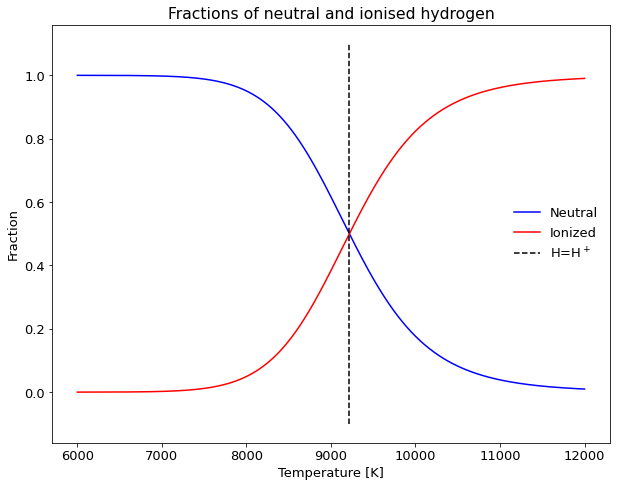

Temperature of equal amounts neutral and ionized Hydrogen: 9218 K


In [53]:
T_photo = np.linspace(int(6e3), int(12e3), int(1e4)) * units.K
Pe_photo = 10 * units.Pa
H_neutral, H_ion = H.compute_populations(T_photo, Pe_photo)

tot_H_neutral = np.nansum(H_neutral, axis=0)
tot_H_ion = np.nansum(H_ion, axis=0)
H_equal_temp = T_photo[np.argmin(abs(tot_H_neutral - tot_H_ion))]

plt.title("Fractions of neutral and ionised hydrogen")
plt.xlabel("Temperature [K]")
plt.ylabel("Fraction")
plt.plot(T_photo, tot_H_neutral, color='blue', label='Neutral')
plt.plot(T_photo, tot_H_ion, color='red', label='Ionized')
plt.vlines(H_equal_temp, ymin=-0.1, ymax=1.1, color='black', ls='--', label='H=H$^+$')
plt.legend()
plt.show()

print(f"Temperature of equal amounts neutral and ionized Hydrogen: {H_equal_temp:.0f}")


Above is a plot of the fraction of neutral and ionised hydrogen in the stellar photospher ($P_e \approx 50$ Pa). For lower temperatures most of the hydrogen is neutral, while for for higher temperatures the majority becomes ionised. The transision is symmetric, and aroun $T\approx 9200$ K there is an equal abundance of netural and ionised hydrogen. 